**Задача 3 (SVM)**

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv ('data.csv')
df = pd.DataFrame(data)
print(df.shape)
df.head()

(1000, 785)


,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,...,H776,H777,H778,H779,H780,H781,H782,H783,H784,y
0,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,3,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,91,97,80,78,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


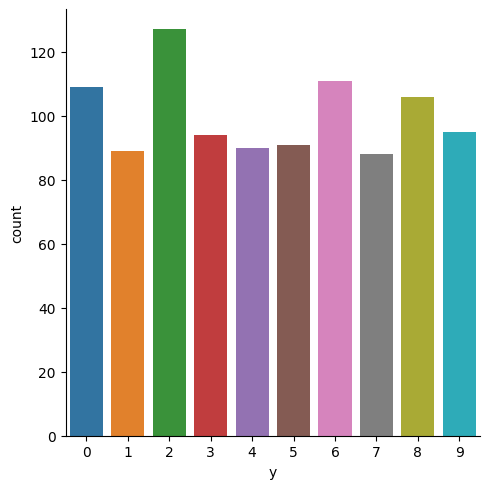

In [3]:
import seaborn as sns

g = sns.catplot(x = 'y', kind = 'count', data=data)

In [4]:
y = df['y']
X = df.drop(columns = ['y'])
print(y.shape)
print(X.shape)

(1000,)
(1000, 784)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.9, random_state=58)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(900, 784) (100, 784) (900,) (100,)


SVM

In [6]:
svm = SVC(kernel='linear', C = 0.1)
svm = svm.fit(X_train, y_train)

In [7]:
pred_svm = svm.predict(X_test)

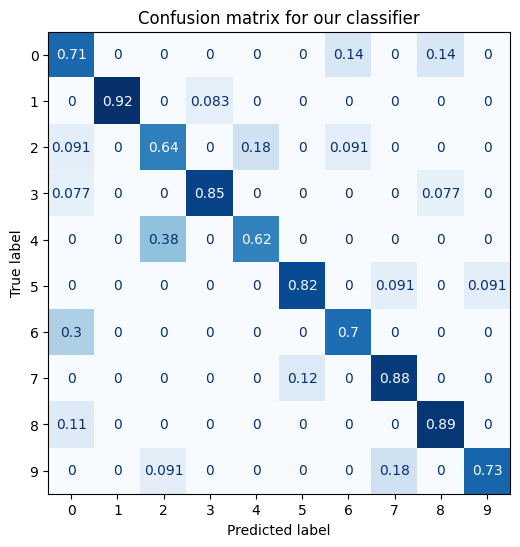

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, ax=ax, colorbar=False, cmap="Blues", normalize="true")
plt.title('Confusion matrix for our classifier')
plt.show()

In [9]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       1.00      0.92      0.96        12
           2       0.64      0.64      0.64        11
           3       0.92      0.85      0.88        13
           4       0.71      0.62      0.67         8
           5       0.90      0.82      0.86        11
           6       0.78      0.70      0.74        10
           7       0.70      0.88      0.78         8
           8       0.80      0.89      0.84         9
           9       0.89      0.73      0.80        11

    accuracy                           0.78       100
   macro avg       0.78      0.77      0.77       100
weighted avg       0.80      0.78      0.79       100



Логистична регресия


In [10]:
lgr = LogisticRegression()
lgr = lgr.fit(X_train, y_train)
pred_lgr = lgr.predict(X_test)

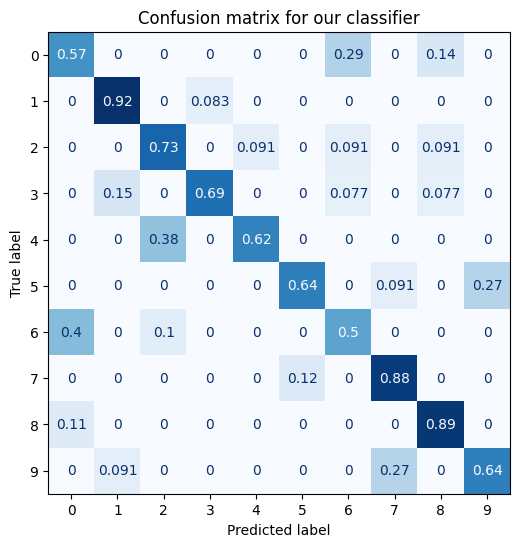

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(lgr, X_test, y_test, ax=ax, colorbar=False, cmap="Blues", normalize="true")
plt.title('Confusion matrix for our classifier')
plt.show()

In [12]:
print(classification_report(y_test,pred_lgr))

              precision    recall  f1-score   support

           0       0.44      0.57      0.50         7
           1       0.79      0.92      0.85        12
           2       0.67      0.73      0.70        11
           3       0.90      0.69      0.78        13
           4       0.83      0.62      0.71         8
           5       0.88      0.64      0.74        11
           6       0.56      0.50      0.53        10
           7       0.64      0.88      0.74         8
           8       0.73      0.89      0.80         9
           9       0.70      0.64      0.67        11

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.70       100
weighted avg       0.73      0.71      0.71       100



1. Намерете 5-те двойки класове, които дават най-добри резултати в SVM и в LogReg като използвате останалите 10% от данните. 
<br>
(0,6) ; (2,4); (0,8); (5,7); (7,9) ->svm 
<br>
(0,6) ; (2,4); (0,8); (5,9); (7,9) ->lgr 
<br>

2. Кой от двата типа модели дава по-добри резултати?
<br>
SVM дава малко по-добри резултати, отколкото логистичната регресия.

3. Подобряват ли се резултатите ако мащабирате данните? 
<br>
Да.


In [13]:
X_std= StandardScaler().fit_transform(X)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y,train_size = 0.9, random_state=58)


In [14]:
svmS = SVC(kernel='linear', C = 0.1)
svmS = svmS.fit(X_train_std, y_train_std)
pred_svm_std = svmS.predict(X_test_std)

In [15]:
print(classification_report(y_test_std,pred_svm_std))

              precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.91      0.83      0.87        12
           2       0.67      0.73      0.70        11
           3       0.83      0.77      0.80        13
           4       1.00      0.62      0.77         8
           5       1.00      0.91      0.95        11
           6       0.58      0.70      0.64        10
           7       0.73      1.00      0.84         8
           8       0.89      0.89      0.89         9
           9       1.00      0.73      0.84        11

    accuracy                           0.79       100
   macro avg       0.81      0.79      0.79       100
weighted avg       0.82      0.79      0.80       100



In [16]:
lgr_std = LogisticRegression()
lgr_std = lgr_std.fit(X_train_std, y_train_std)
pred_lgr_std = lgr_std.predict(X_test_std)

In [17]:
print(classification_report(y_test_std,pred_lgr_std))

              precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.91      0.83      0.87        12
           2       0.64      0.64      0.64        11
           3       0.85      0.85      0.85        13
           4       0.50      0.38      0.43         8
           5       1.00      0.73      0.84        11
           6       0.55      0.60      0.57        10
           7       0.62      1.00      0.76         8
           8       0.71      0.56      0.63         9
           9       0.80      0.73      0.76        11

    accuracy                           0.71       100
   macro avg       0.71      0.70      0.69       100
weighted avg       0.73      0.71      0.71       100



4. Чрез `GridSearchCV` на `sklearn` намерете най-добрите стойности на хиперпараметрите на SVM с нелинейни ядра. Как бихте оценили подобрението в точността на нелинейния модел спрямо тази на линейния модел? 

In [18]:
param_grid = {'C': [0.1, 1, 10, 100],  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf', 'poly', 'sigmoid']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
grid.fit(X_train, y_train) 
 
grid_predictions = grid.predict(X_test) 

print(grid.best_params_) 

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.128 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.128 total time=   0.3s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.133 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.128 total time=   0.3s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.789 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.756 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.711 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.744 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.772 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.128 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.133 total time=   0.2s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

In [19]:
print(confusion_matrix(y_test,grid_predictions))

[[ 5  0  0  1  0  0  1  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0]
 [ 1  0  7  0  1  0  1  0  1  0]
 [ 0  2  0  9  0  0  2  0  0  0]
 [ 0  0  3  1  2  0  2  0  0  0]
 [ 0  0  0  0  0  7  0  4  0  0]
 [ 2  0  0  0  0  0  7  0  1  0]
 [ 0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  8  1]
 [ 0  1  0  0  0  0  0  2  0  8]]


In [20]:
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.80      1.00      0.89        12
           2       0.70      0.64      0.67        11
           3       0.82      0.69      0.75        13
           4       0.67      0.25      0.36         8
           5       1.00      0.64      0.78        11
           6       0.54      0.70      0.61        10
           7       0.57      1.00      0.73         8
           8       0.80      0.89      0.84         9
           9       0.89      0.73      0.80        11

    accuracy                           0.73       100
   macro avg       0.74      0.72      0.71       100
weighted avg       0.76      0.73      0.72       100

